<a href="https://colab.research.google.com/github/pttrilok/courses/blob/master/Intro%20to%20ML/Lesson%2003%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***In this module we are going to learn about ***
1. How to solve a ml problem from scratch
2. One hot encoding
3. Random Forest Hyperparameters

2nd and 3rd will be considered if we are left with enough time 


***Workflow stages***

The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Analyze, identify patterns, and explore the data.
4. Wrangle, prepare and Clean the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

# ***1.) Question and problem definition***


Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition for Titanic Survival competition is described here at Kaggle.

Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.


On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

***Workflow goals***


The data science solutions workflow solves for seven major goals.

1. ***Classifying***. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

2. ***Correlating***. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

3. ***Converting***. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

4. ***Completing***. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

5. ***Correcting***. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

6. ***Creating***. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

7. ***Chart creation***. How to select the right visualization plots and charts depending on nature of the data and the solution goals.

***About Data (Taken from the Official page ***


**`Overview`**

The data has been split into two groups:

1. training set (train.csv)
2. test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

***`Data Dictionary`***

Variable -->	Definition -->	Key

survival  -->	Survival	--> 0 = No, 1 = Yes
pclass	  --> Ticket class	 -->1 = 1st, 2 = 2nd, 3 = 3rd
sex       -->	Sex	
Age	      --> Age in years	
sibsp 	  --> # of siblings / spouses aboard the Titanic	
parch	    --> # of parents / children aboard the Titanic	
ticket	  --> Ticket number	
fare	    --> Passenger fare	
cabin	    --> Cabin number	
embarked	--> Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


***Variable Notes***

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# ***2.)Acquire training and testing data.***

***Getting Required libraries***

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#our model
from sklearn.ensemble import RandomForestClassifier


***Downloading dataset (Using Jugad technology)***

In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8,hi;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/3136/26502/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1602043748&Signature=jTFyBD7BLsMHOwizUbirszM4CZVDv429ZQz%2BaGR%2F5%2FSwsAu%2B0S5ydRIp8x6u%2BZOtEwGVMAD0fy1HHmJghPG2GrkpZrTzlcvSZK3Ss8TLSx2%2BYaDA9vojU0fPtPbj%2BQoNOod6mvq83MZexMvvsZlPODTHy%2BjXr4NuTu9vFgXzDQTCq%2BP1pBCYTIUn%2FjmmWCjHlGb9FtB9sbtc3uvuPlqEQXNG8ogo3nIzS%2FnY52qAvUB3K143RH7%2BLhxSIa3FwhaUJoq%2Bmwnag%2FrimdyxYi7CB5fbS5MfVu15%2BbXNGSeSNjr8IPe4cQ8QCZnJHBxkNmqL7E1PGkmgrR4hRXkZB%2FbTzw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv" -c -O 'train.csv'
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8,hi;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/3136/26502/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1602043823&Signature=qdLW8DzY0quRFcSKiXAaiKPqTQtF8gYeC8NVAXysOg2jcnK81uYDF3Gv4Yc5TQHCFlKl6VPydkkx2DRLAdFaI7g4swQQs%2Faub4Okb09P%2BO2tyh6gfnkzz7h85mYof8lIk5v9%2FkndML0FGPtlWMqd2ZNo009anAOae53vvlCrZVze0LmzXht3GPwh%2Bg6Rl9gvWs6loDTxTX%2BKSbvxwEqnIfUkI4sclY%2BSaN%2BQxppRzf7tqEwJl6L5qG4oShccq6MGG131P32iQ69UuEHInB%2F6Wu8pEm9LbjwkRLTprlp1gHZOkYOHOr3Sk88o2e3PuBAqPlHhnRqHWkomXs4%2B9mxuGQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv" -c -O 'test.csv'

--2020-10-05 08:34:18--  https://storage.googleapis.com/kagglesdsdata/competitions/3136/26502/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1602043748&Signature=jTFyBD7BLsMHOwizUbirszM4CZVDv429ZQz%2BaGR%2F5%2FSwsAu%2B0S5ydRIp8x6u%2BZOtEwGVMAD0fy1HHmJghPG2GrkpZrTzlcvSZK3Ss8TLSx2%2BYaDA9vojU0fPtPbj%2BQoNOod6mvq83MZexMvvsZlPODTHy%2BjXr4NuTu9vFgXzDQTCq%2BP1pBCYTIUn%2FjmmWCjHlGb9FtB9sbtc3uvuPlqEQXNG8ogo3nIzS%2FnY52qAvUB3K143RH7%2BLhxSIa3FwhaUJoq%2Bmwnag%2FrimdyxYi7CB5fbS5MfVu15%2BbXNGSeSNjr8IPe4cQ8QCZnJHBxkNmqL7E1PGkmgrR4hRXkZB%2FbTzw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]  5

***Upto this point you must be having train.csv and test.csv with you in current working directory***

# ***3. Analyze, identify patterns, and explore the data***

***Reading both files***

In [32]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

combine = [train_df, test_df]

***Analyze by describing data***

In [32]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [14]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [33]:
df_raw=train_df
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)
            
display_all(df_raw.transpose())

0    \
PassengerId                        1   
Survived                           0   
Pclass                             3   
Name         Braund, Mr. Owen Harris   
Sex                             male   
Age                               22   
SibSp                              1   
Parch                              0   
Ticket                     A/5 21171   
Fare                            7.25   
Cabin                            NaN   
Embarked                           S   

                                                           1    \
PassengerId                                                  2   
Survived                                                     1   
Pclass                                                       1   
Name         Cumings, Mrs. John Bradley (Florence Briggs Th...   
Sex                                                     female   
Age                                                         38   
SibSp                                                        1   
Parch                                                        0   
Ticket                                                PC 17599   
Fare                                                   71.2833   
Cabin                                                      C85   
Embarked                                                     C   

                                2    \
PassengerId                       3   
Survived                          1   
Pclass                            3   
Name         Heikkinen, Miss. Laina   
Sex                          female   
Age                              26   
SibSp                             0   
Parch                             0   
Ticket             STON/O2. 3101282   
Fare                          7.925   
Cabin                           NaN   
Embarked                          S   

                                                      3    \
PassengerId                                             4   
Survived                                                1   
Pclass                                                  1   
Name         Futrelle, Mrs. Jacques Heath (Lily May Peel)   
Sex                                                female   
Age                                                    35   
SibSp                                                   1   
Parch                                                   0   
Ticket                                             113803   
Fare                                                 53.1   
Cabin                                                C123   
Embarked                                                S   

                                  4                 5    \
PassengerId                         5                 6   
Survived                            0                 0   
Pclass                              3                 3   
Name         Allen, Mr. William Henry  Moran, Mr. James   
Sex                              male              male   
Age                                35               NaN   
SibSp                               0                 0   
Parch                               0                 0   
Ticket                         373450            330877   
Fare                             8.05            8.4583   
Cabin                             NaN               NaN   
Embarked                            S                 Q   

                                 6                               7    \
PassengerId                        7                               8   
Survived                           0                               0   
Pclass                             1                               3   
Name         McCarthy, Mr. Timothy J  Palsson, Master. Gosta Leonard   
Sex                             male                            male   
Age                               54                               2   
SibSp                              0                               3   
Parch  

In [17]:
df_raw.shape

(891, 12)

***Checking Null value ratio***

In [18]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Age            0.198653
Cabin          0.771044
Embarked       0.002245
Fare           0.000000
Name           0.000000
Parch          0.000000
PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Survived       0.000000
Ticket         0.000000
dtype: float64

***Checking type of object carried in dataframe***

In [34]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Which features are categorical?***


These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: ***Survived, Sex, and Embarked. Ordinal: Pclass***.

***Which features are numerical?***

These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Continous: ***Age, Fare. Discrete: SibSp, Parch***.

***Which features are mixed data types?***

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

***Ticket*** is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

***Which features contain blank, null or empty values?***

These will require correcting.

***Cabin > Age > Embarked*** features contain a number of null values in that order for the training dataset.


***Cabin > Age*** are incomplete in case of test dataset.

***Analyzing PClass relationship with Survival***

In [19]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


***Analyzing Gender relationship with Survival***

In [20]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


***Analyzing Sibsp relationship with Survival***

In [26]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'],as_index= False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


***Analyzing Parch relationship with Survival***

In [22]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


***`Analyzing Age relationship with Survival`***

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


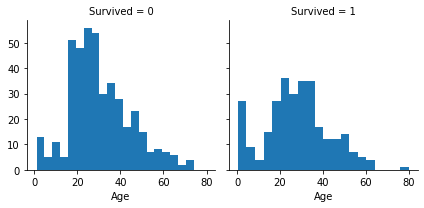

In [27]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


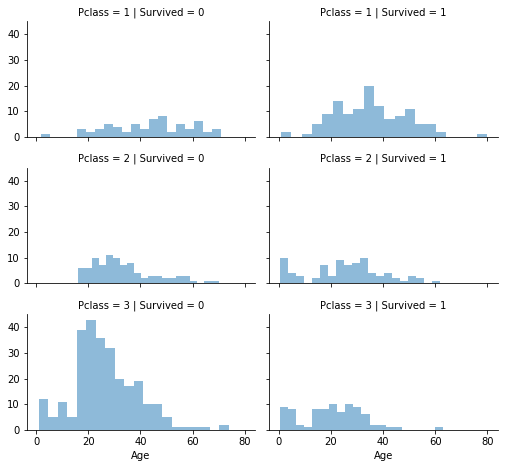

In [28]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


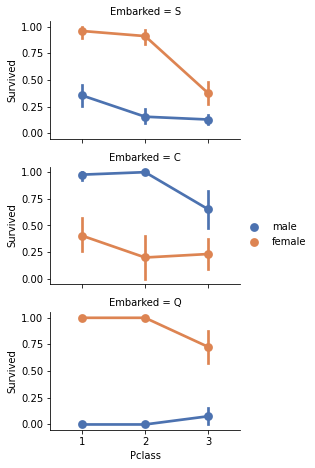

In [29]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


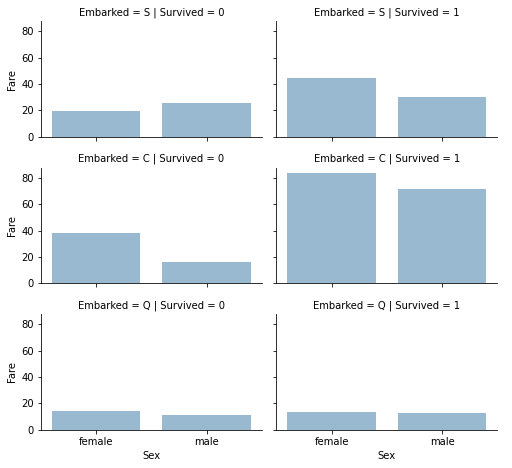

In [30]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# ***4.) Wrangle, prepare and Clean the data.***

***Wrangle Data***

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

***Correcting by dropping features***

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [42]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

***`Creating new feature extracting from existing`***

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

***Observations.***

When we plot Title, Age, and Survived, we note the following observations.

Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
Survival among Title Age bands varies slightly.
Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

***Decision.***

We decide to retain the new Title feature for model training.

In [43]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


**`*We can replace many titles with a more common name or classify them as Rare.*`**

In [44]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


***We can convert the categorical titles to ordinal.***

In [45]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


***Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.***

In [46]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

***Converting a categorical feature***

In [47]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


***Completing a numerical continuous feature***

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


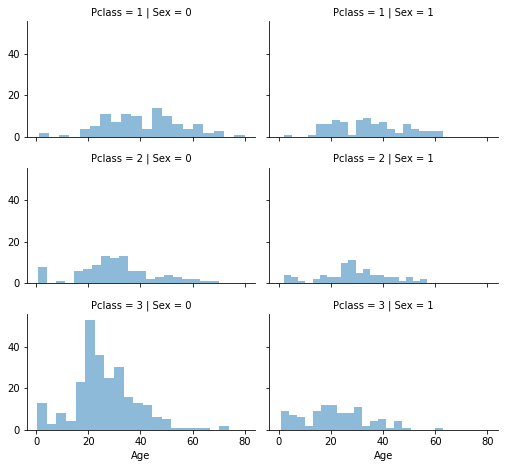

In [12]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [48]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [49]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [50]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [51]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can  remove the AgeBand feature.

In [52]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


Create new feature combining existing features
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [53]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


***We can create another feature called IsAlone.***

In [54]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [55]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,S,1,2,0
1,1,1,1,2,71.2833,C,3,2,0
2,1,3,1,1,7.9250,S,2,1,1
3,1,1,1,2,53.1000,S,3,2,0
4,0,3,0,2,8.0500,S,1,1,1


We can also create an artificial feature combining Pclass and Age.

In [56]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


**`Completing a categorical feature`**

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [57]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [58]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


***Converting categorical feature to numeric***

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [59]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,2,0,3
1,1,1,1,2,71.2833,1,3,2,0,2
2,1,3,1,1,7.9250,0,2,1,1,3
3,1,1,1,2,53.1000,0,3,2,0,2
4,0,3,0,2,8.0500,0,1,1,1,6


Quick completing and converting a numeric feature
We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [60]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,1,6
1,893,3,1,2,7.0000,0,3,2,0,6
2,894,2,0,3,9.6875,2,1,1,1,6
3,895,3,0,1,8.6625,0,1,1,1,3
4,896,3,1,1,12.2875,0,3,3,0,3


***We can create a FareBand.***

In [61]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


***Convert the Fare feature to ordinal values based on the FareBand.***

In [62]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,0,0,1,2,0,3
1,1,1,1,2,3,1,3,2,0,2
2,1,3,1,1,1,0,2,1,1,3
3,1,1,1,2,3,0,3,2,0,2
4,0,3,0,2,1,0,1,1,1,6
5,0,3,0,1,1,2,1,1,1,3
6,0,1,0,3,3,0,1,1,1,3
7,0,3,0,0,2,0,4,5,0,0
8,1,3,1,1,1,0,3,3,0,3
9,1,2,1,0,2,1,3,2,0,0


***And the test dataset.***

In [28]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# ***5.) Model, predict and solve the problem***

In [63]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

***Fitting the model***

In [64]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.66

***Making predictions on test set***

In [65]:
Y_pred = random_forest.predict(X_test)

***getting an Correct answer file***

In [71]:
!wget -O "titanic.csv" "https://raw.githubusercontent.com/pttrilok/courses/master/Intro%20to%20ML/patches/titanic.csv"

--2020-10-05 10:29:54--  https://raw.githubusercontent.com/pttrilok/courses/master/Intro%20to%20ML/patches/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2839 (2.8K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]   2.77K  --.-KB/s    in 0s      

2020-10-05 10:29:55 (27.8 MB/s) - ‘titanic.csv’ saved [2839/2839]



In [73]:
correct_ans = pd.read_csv("titanic.csv")

In [76]:
solution_set = correct_ans['Survived']

***Comparing both Files***

In [83]:
correct_ans=0;
for i in range(len(solution_set)):
  if  solution_set.iloc[i] == Y_pred[i]:
    print(solution_set.iloc[i]," ",Y_pred[i]," ✓")
    correct_ans+= 1
  else:
    print(solution_set.iloc[i]," ",Y_pred[i]," ✘")


0   0  ✓
1   0  ✘
0   0  ✓
0   0  ✓
1   0  ✘
1   0  ✘
0   1  ✘
1   0  ✘
1   1  ✓
0   0  ✓
0   0  ✓
0   1  ✘
1   1  ✓
0   0  ✓
1   1  ✓
1   1  ✓
0   0  ✓
0   0  ✓
0   0  ✓
1   0  ✘
0   0  ✓
1   1  ✓
1   1  ✓
1   0  ✘
1   1  ✓
0   0  ✓
1   1  ✓
0   0  ✓
0   1  ✘
0   0  ✓
0   0  ✓
0   0  ✓
1   1  ✓
0   1  ✘
1   0  ✘
0   0  ✓
1   0  ✘
0   0  ✓
1   0  ✘
1   1  ✓
1   0  ✘
0   1  ✘
0   0  ✓
0   1  ✘
1   1  ✓
0   0  ✓
1   1  ✓
0   0  ✓
1   1  ✓
1   1  ✓
0   0  ✓
0   0  ✓
1   1  ✓
1   1  ✓
0   0  ✓
0   0  ✓
0   0  ✓
1   0  ✘
0   0  ✓
1   1  ✓
0   0  ✓
0   0  ✓
0   0  ✓
1   1  ✓
1   1  ✓
0   1  ✘
0   1  ✘
0   0  ✓
1   1  ✓
1   1  ✓
1   1  ✓
0   0  ✓
0   0  ✓
0   1  ✘
1   1  ✓
0   0  ✓
0   0  ✓
1   1  ✓
0   0  ✓
0   1  ✘
0   1  ✘
0   0  ✓
0   0  ✓
0   0  ✓
0   1  ✘
0   0  ✓
0   1  ✘
1   0  ✘
0   1  ✘
1   1  ✓
1   1  ✓
0   0  ✓
1   0  ✘
0   0  ✓
0   1  ✘
1   0  ✘
1   1  ✓
0   0  ✓
0   1  ✘
0   0  ✓
1   1  ✓
0   0  ✓
0   0  ✓
1   0  ✘
1   1  ✓
0   0  ✓
1   0  ✘
1   0  ✘
0   0  ✓
0   0  ✓
0   0  ✓
1